<a href="https://colab.research.google.com/github/theakash07/Machine_learning/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kaggle** **House** **Price** **Prediction**

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np #numpy
import pandas as pd #pandas
import matplotlib.pyplot as plt #matplotlib for drawing
%matplotlib inline
import seaborn as sns #advance version of matplotlib
from scipy import stats #statistical computation library


In [2]:
# Mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Connecting my goolge drive to store and fetch the data

In [3]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/HPdata/train.csv') #imported the data in train csv
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/HPdata/test.csv') #imported the data from drive

In [4]:
train.info() # Display concise information about the 'train' DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.columns # Retrieve the column names of the 'train' DataFrame

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.describe() # descriptive statistics for the 'train' DataFrame

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Row = 1459
Column = 81

In [7]:
train.head(5) ## Display the first 5 rows of the 'train' DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.isnull().sum() ## Count the missing values in each column of the 'train' DataFrame

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train.dtypes[train.dtypes != 'object'] ## Select numeric columns in the 'train' DataFrame

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Now we will look at outliers which can impact the data

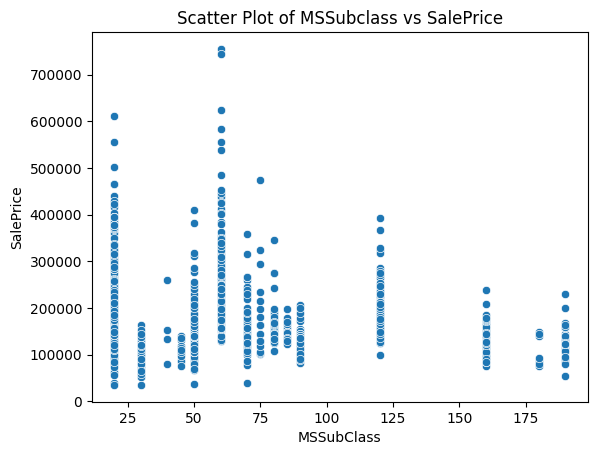

In [10]:
# Create a scatter plot using Seaborn for MSSubClass against SalePrice
sns.scatterplot(x='MSSubClass', y='SalePrice', data=train)
plt.xlabel('MSSubClass')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of MSSubclass vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

Extensively trying to look at the outliers

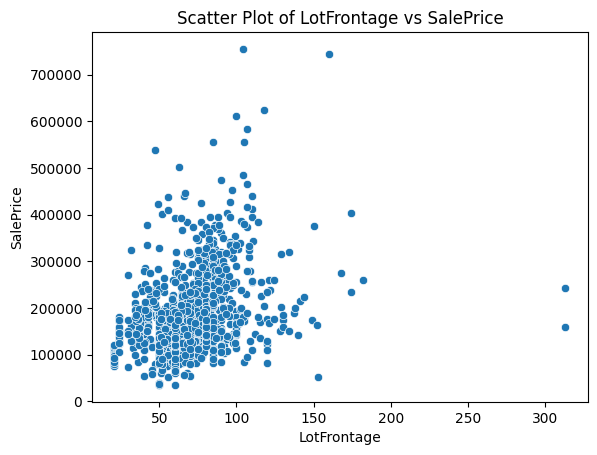

In [11]:

# Create a scatter plot using Seaborn for Lotfrontage against SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train)
plt.xlabel('LotFrontage')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of LotFrontage vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

After identifying the outliers we need to drop them
so making tally for it

In [12]:
train.query('LotFrontage > 300') # Query the 'train' DataFrame for rows where LotFrontage is greater than 300

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Row's to drop ⁉

1.   935
2.   1299

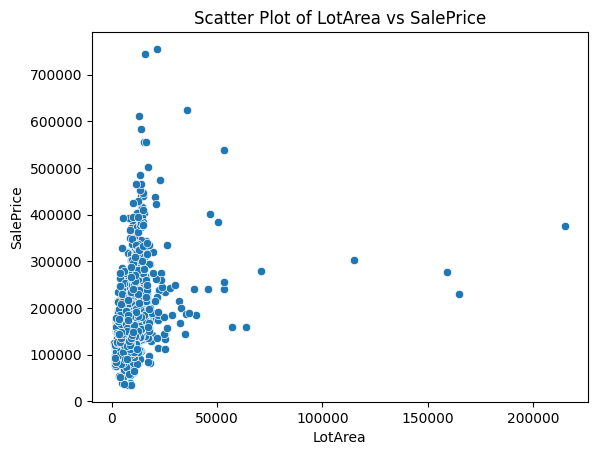

In [13]:
#Create a scatter plot using Seaborn for LotArea against SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=train)
plt.xlabel('LotArea')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of LotArea vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [14]:
train.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


**You can see the outliers that we need to Drop**


*   250
*   314


*   336
*   707

*   maybe -1397









In [15]:
stats.zscore(train['LotArea']).sort_values().tail(8)
#calculates the Z-scores for the 'LotArea' column,
#sorts them in ascending order, and then selects the 8 largest Z-scores along with their corresponding 'LotArea' values.

769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

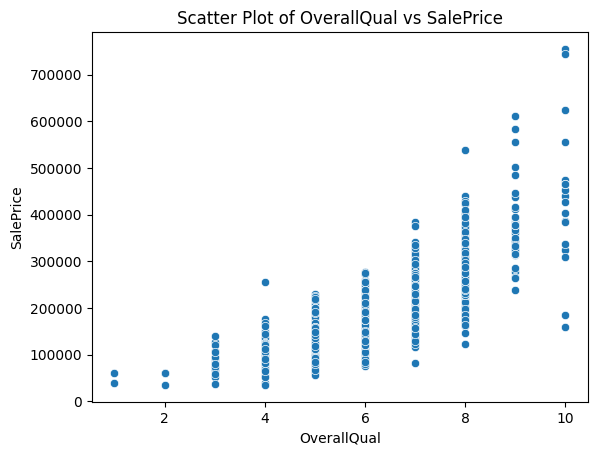

In [16]:
#Create a scatter plot using Seaborn for OverallQual against SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=train)
plt.xlabel('OverallQual')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of OverallQual vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

As you can see there is 2 outliers at 10 which is at very low price
potential outlier

In [17]:
# Query the 'train' DataFrame for rows where 'OverallQual' is equal to 10
train.query('OverallQual ==10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


Drop

*   maybe 524
*   maybe 1299 already selected



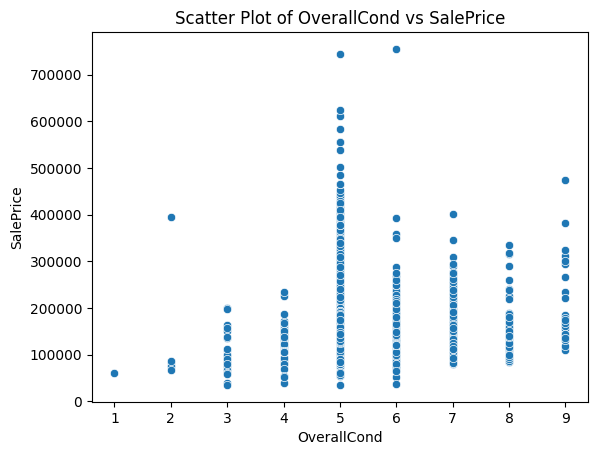

In [18]:
#Create a scatter plot using Seaborn for OverallCond against SalePrice
sns.scatterplot(x='OverallCond', y='SalePrice', data=train)
plt.xlabel('OverallCond')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of OverallCond vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [19]:
train.query('OverallCond ==2 ')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


drop:


1.   379
2.   List item



In [20]:
train.query('OverallCond == 5 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


drop:


1.   1183



In [21]:
train.query('OverallCond == 6 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


Drop:

*   692



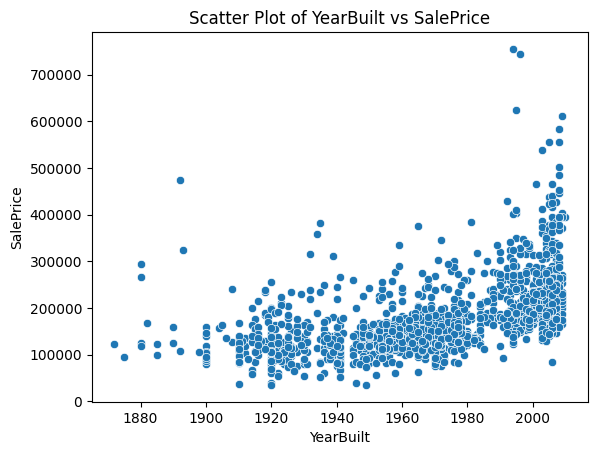

In [22]:
#Create a scatter plot using Seaborn for YearBuilt against SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)
plt.xlabel('YearBuilt')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of YearBuilt vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [23]:
train.query('YearBuilt<1900 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


potential threat mush remove


*   186



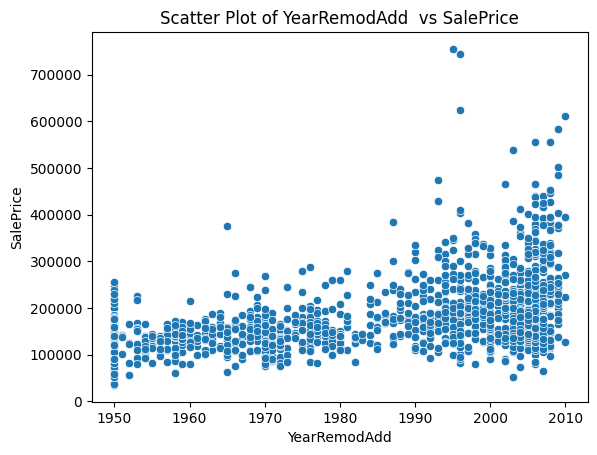

In [24]:
#Create a scatter plot using Seaborn for YearRemodAdd  against SalePrice
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=train)
plt.xlabel('YearRemodAdd')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of YearRemodAdd  vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

No Finding the outliers

In [25]:
train.query('YearRemodAdd<1979 & SalePrice > 300000')
#Query the 'train' DataFrame to filter rows where 'YearRemodAdd' is less than 1979 and 'SalePrice' is greater than 300,000

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


Consider to drop
1. 314

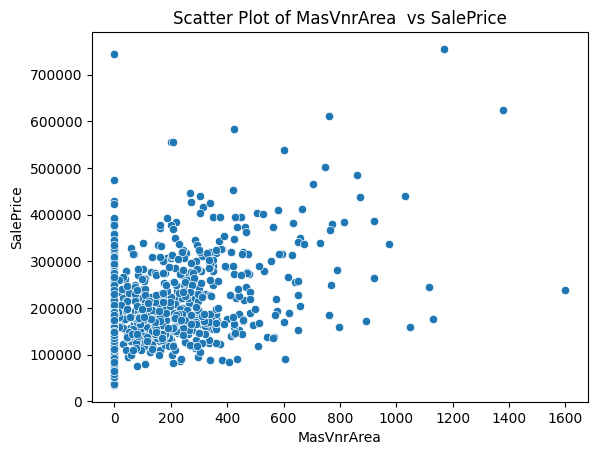

In [26]:
#Create a scatter plot using Seaborn for MasVnrArea  against SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=train)
plt.xlabel('MasVnrArea')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of MasVnrArea  vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [27]:
train.query('MasVnrArea > 1500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


Consider to Remove


*   298



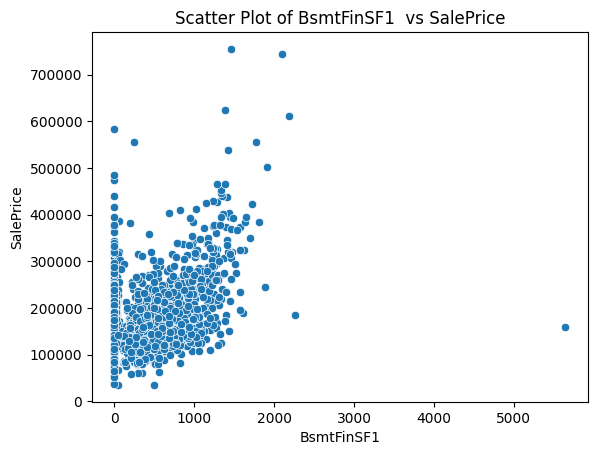

In [28]:
#Create a scatter plot using Seaborn for BsmtFinSF1  against SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=train)
plt.xlabel('BsmtFinSF1')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BsmtFinSF1  vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [29]:
train.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Consider to remove :


*   1299 -> which is already done



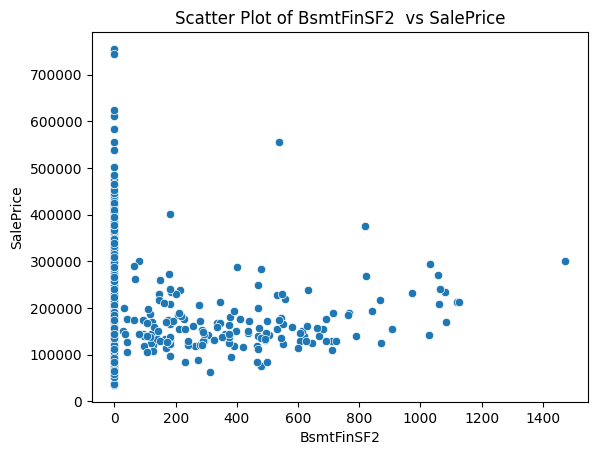

In [30]:
#Create a scatter plot using Seaborn for BsmtFinSF2  against SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=train)
plt.xlabel('BsmtFinSF2')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BsmtFinSF2  vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [31]:
train.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


consider to remove:
441

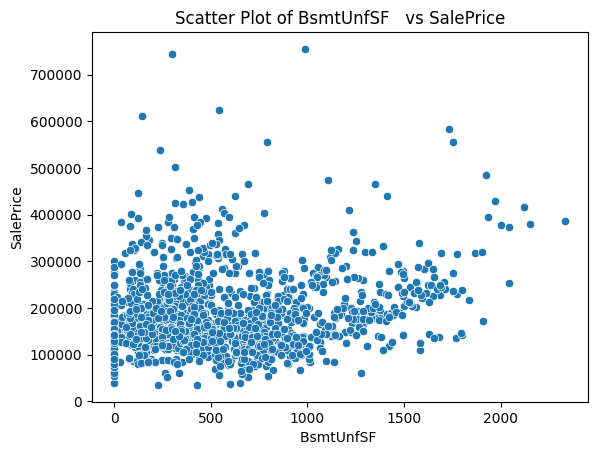

In [32]:
#Create a scatter plot using Seaborn for BsmtUnfSF   against SalePrice
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=train)
plt.xlabel('BsmtUnfSF ')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BsmtUnfSF   vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


The Graph is fine

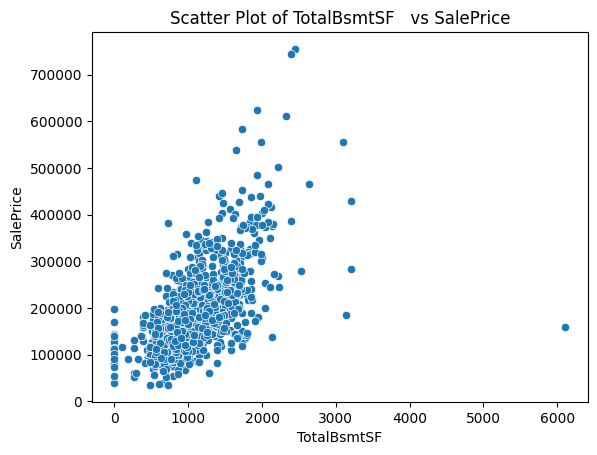

In [33]:
#Create a scatter plot using Seaborn for TotalBsmtSF   against SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)
plt.xlabel('TotalBsmtSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of TotalBsmtSF   vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


In [34]:
train.query('TotalBsmtSF > 6000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


#1299 again

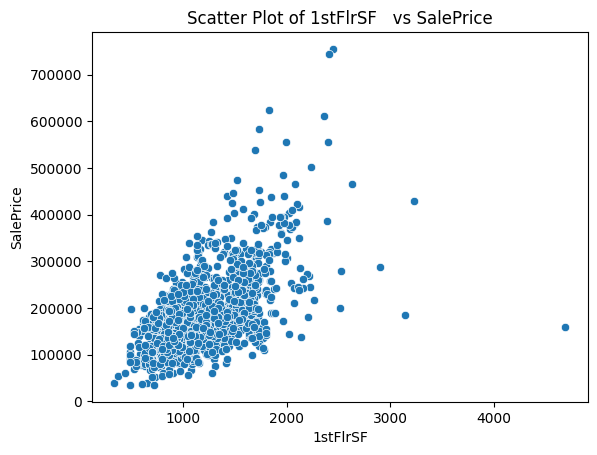

In [35]:
#Create a scatter plot using Seaborn for 1stFlrSF   against SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)
plt.xlabel('1stFlrSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of 1stFlrSF   vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


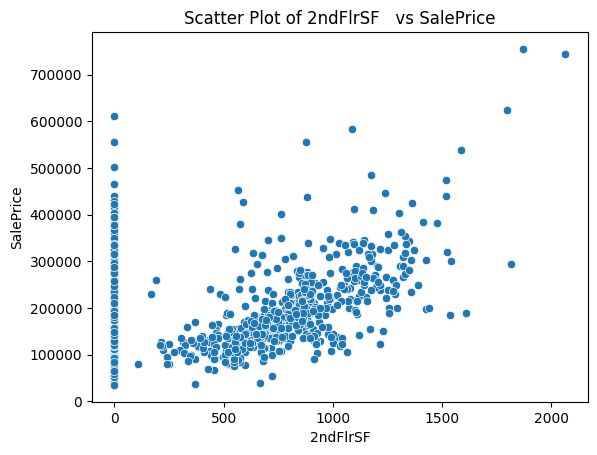

In [36]:
#Create a scatter plot using Seaborn for 2ndFlrSF   against SalePrice
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=train)
plt.xlabel('2ndFlrSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of 2ndFlrSF   vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


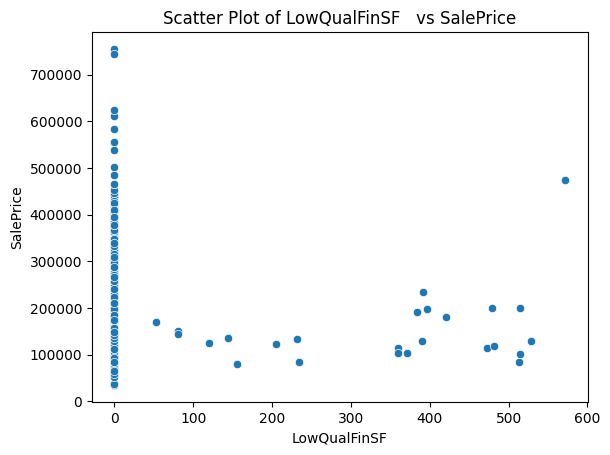

In [37]:
#Create a scatter plot using Seaborn for LowQualFinSF     against SalePrice
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=train)
plt.xlabel('LowQualFinSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of LowQualFinSF   vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


In [38]:
train.query('LowQualFinSF > 500')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


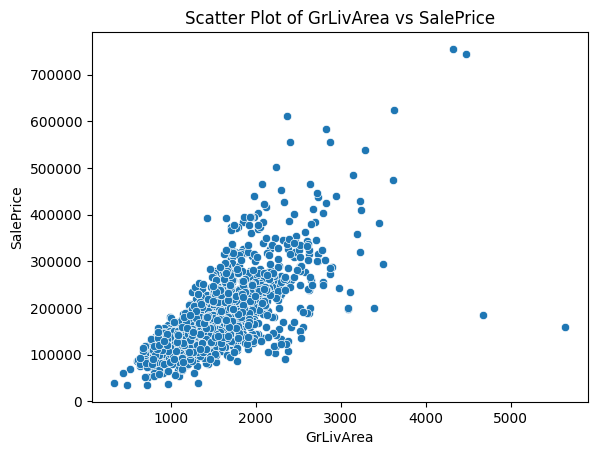

In [39]:
#Create a scatter plot using Seaborn for GrLivArea     against SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.xlabel('GrLivArea')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GrLivArea vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot


In [40]:
train.query('GrLivArea > 4400')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


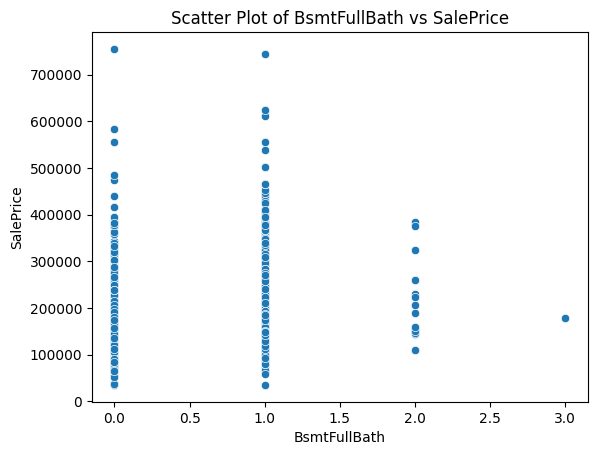

In [41]:
#Create a scatter plot using Seaborn for BsmtFullBath    against SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=train)
plt.xlabel('BsmtFullBath')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BsmtFullBath vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [42]:
train.query('BsmtFullBath ==3')
#739 consider to remove

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


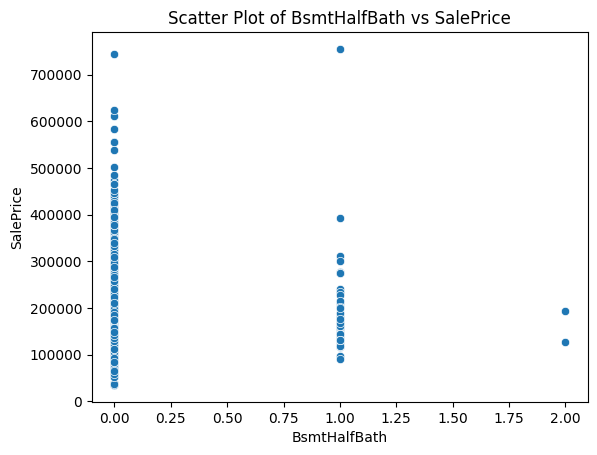

In [43]:
#Create a scatter plot using Seaborn for BsmtHalfBath   against SalePrice
sns.scatterplot(x='BsmtHalfBath', y='SalePrice', data=train)
plt.xlabel('BsmtHalfBath')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BsmtHalfBath vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [44]:
#now again finding the z score to find the most dispersed deviation
stats.zscore(train['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [45]:
train.query('BsmtHalfBath ==2') #looking for outliers
#598
#955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


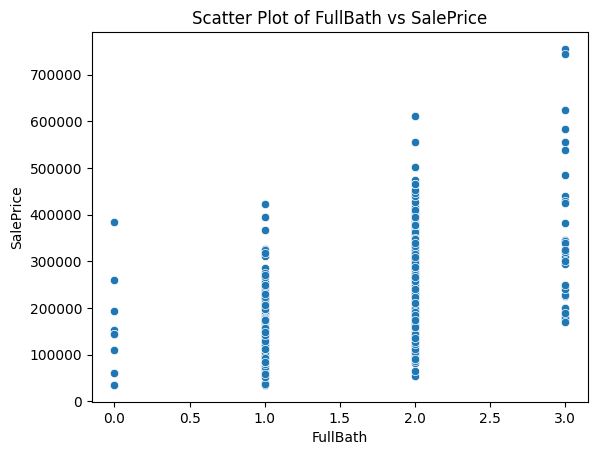

In [46]:
#Create a scatter plot using Seaborn for FullBath   against SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=train)
plt.xlabel('FullBath')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of FullBath vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

Nothing to crazy in the data


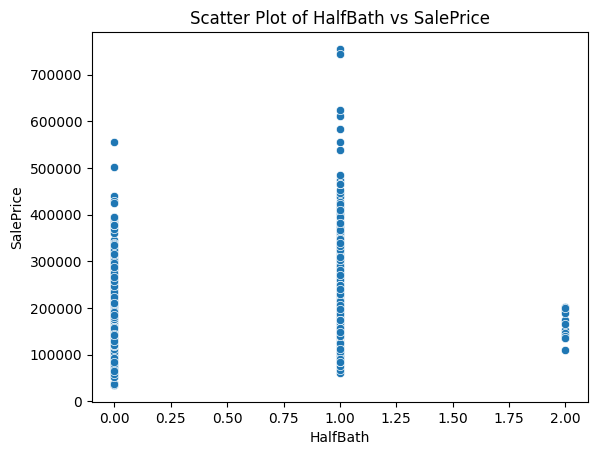

In [47]:
#Create a scatter plot using Seaborn for HalfBath   against SalePrice
sns.scatterplot(x='HalfBath', y='SalePrice', data=train)
plt.xlabel('HalfBath')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of HalfBath vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

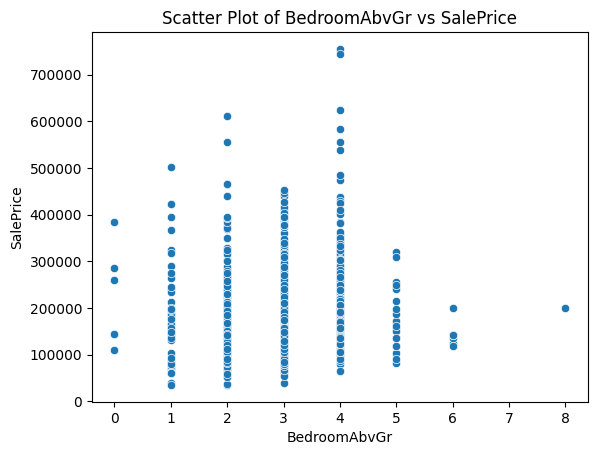

In [48]:
#Create a scatter plot using Seaborn for BedroomAbvGr   against SalePrice
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=train)
plt.xlabel('BedroomAbvGr')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of BedroomAbvGr vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [49]:
train.query('BedroomAbvGr ==8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


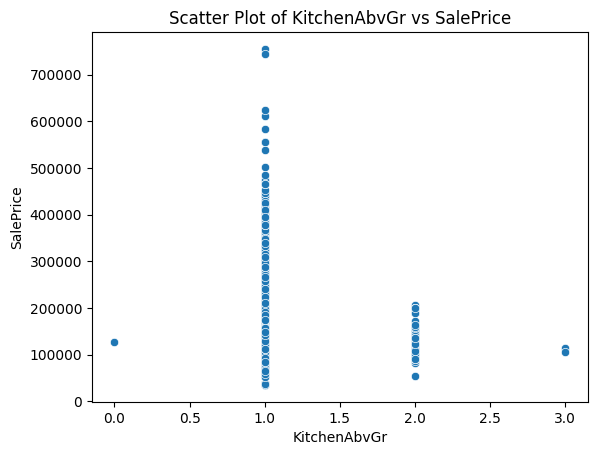

In [50]:
#Create a scatter plot using Seaborn for KitchenAbvGr   against SalePrice
sns.scatterplot(x='KitchenAbvGr', y='SalePrice', data=train)
plt.xlabel('KitchenAbvGr')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of KitchenAbvGr vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [51]:
train.query('KitchenAbvGr ==3')
#cosider to remove row:
#1. 49
#2. 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


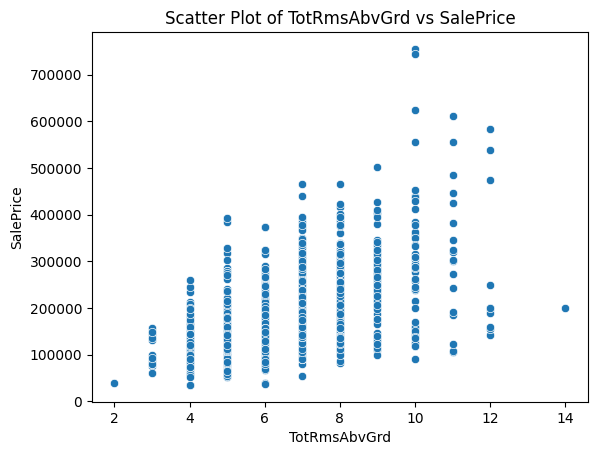

In [52]:
#Create a scatter plot using Seaborn for TotRmsAbvGrd   against SalePrice
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=train)
plt.xlabel('TotRmsAbvGrd')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of TotRmsAbvGrd vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [53]:
train.query('TotRmsAbvGrd ==14')
#cosider to remove the row
#1. 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


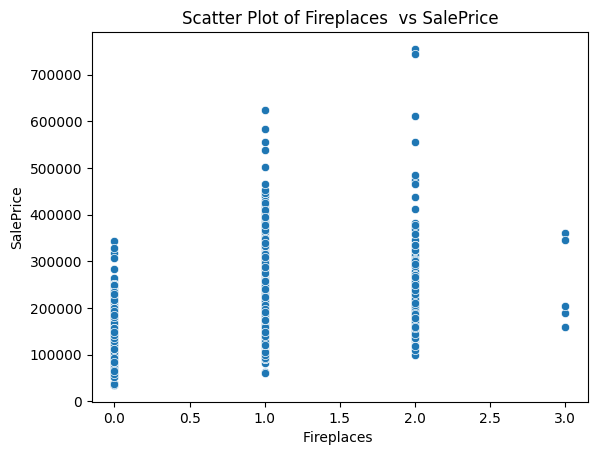

In [54]:
#Create a scatter plot using Seaborn for Fireplaces   against SalePrice
sns.scatterplot(x='Fireplaces', y='SalePrice', data=train)
plt.xlabel('Fireplaces ')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of Fireplaces  vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

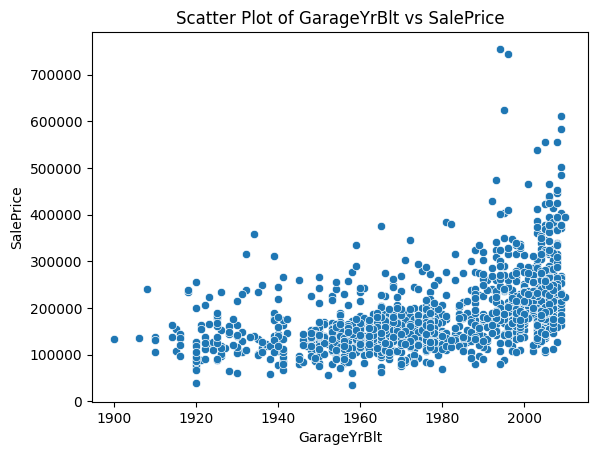

In [55]:
#Create a scatter plot using Seaborn for GarageYrBlt  against SalePrice
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=train)
plt.xlabel('GarageYrBlt')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageYrBlt vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

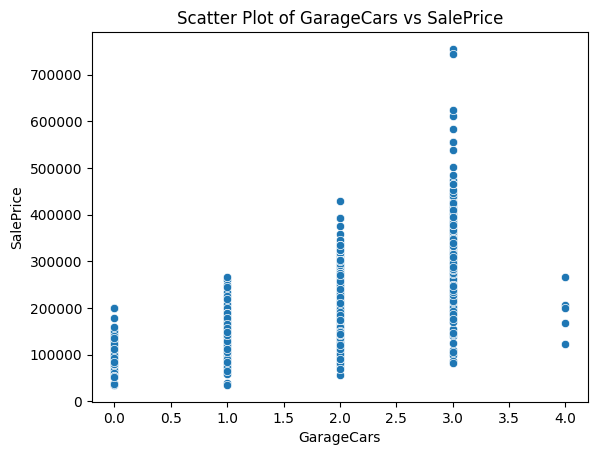

In [56]:
#Create a scatter plot using Seaborn for GarageCars  against SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=train)
plt.xlabel('GarageCars')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageCars vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

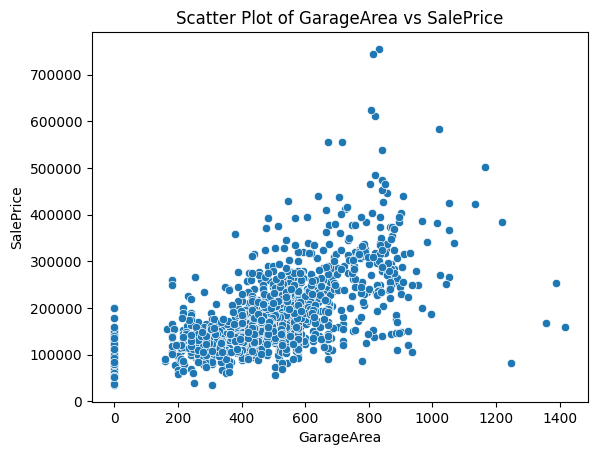

In [57]:
#Create a scatter plot using Seaborn for GarageArea  against SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)
plt.xlabel('GarageArea')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageArea vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [58]:
train.query('GarageArea > 1200')
#potential outliers
#1062,1191
#rest of columns already considerd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


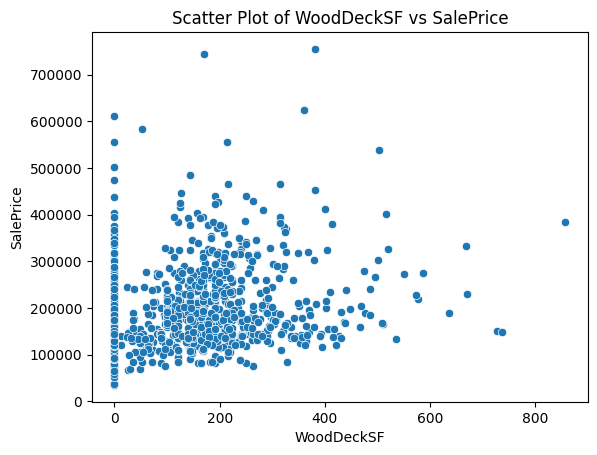

In [59]:
#Create a scatter plot using Seaborn for WoodDeckSF  against SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=train)
plt.xlabel('WoodDeckSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of WoodDeckSF vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

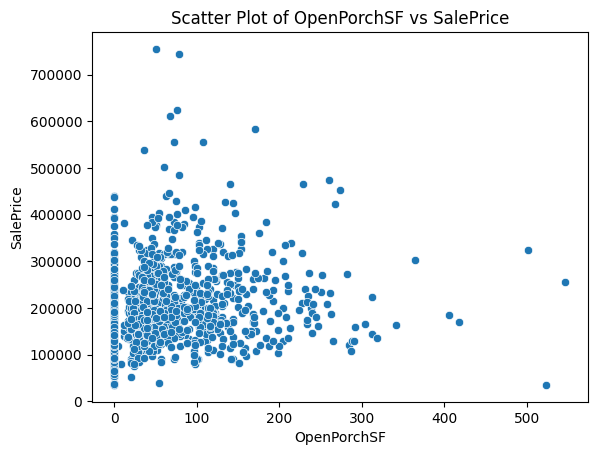

In [60]:
#Create a scatter plot using Seaborn for OpenPorchSF  against SalePrice
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=train)
plt.xlabel('OpenPorchSF')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of OpenPorchSF vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [61]:
train.query('OpenPorchSF > 500')
#496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


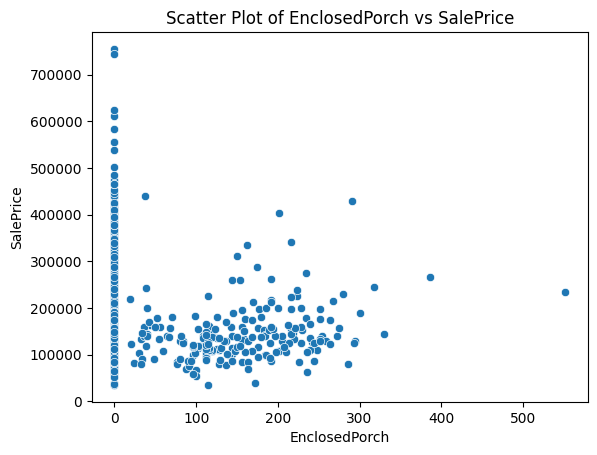

In [62]:
#Create a scatter plot using Seaborn for EnclosedPorch  against SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=train)
plt.xlabel('EnclosedPorch')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of EnclosedPorch vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [63]:
train.query('EnclosedPorch > 500')
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


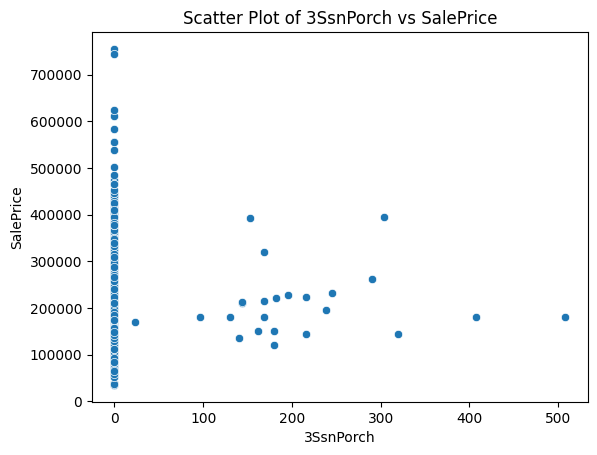

In [64]:
#Create a scatter plot using Seaborn for 3SsnPorch  against SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=train) #three season Porch area in square feet
plt.xlabel('3SsnPorch')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of 3SsnPorch vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

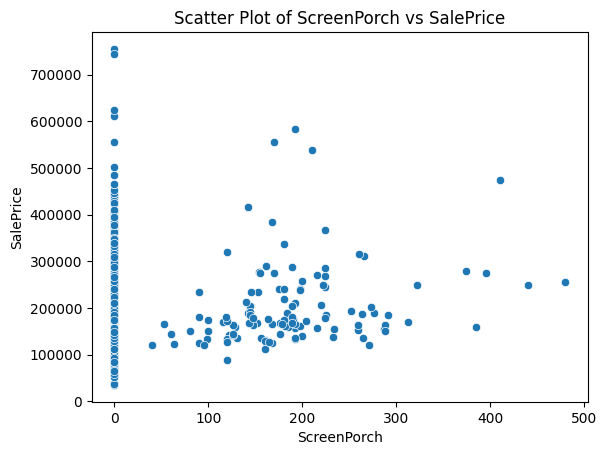

In [65]:
#Create a scatter plot using Seaborn for ScreenPorch  against SalePrice
sns.scatterplot(x='ScreenPorch', y='SalePrice', data=train)
plt.xlabel('ScreenPorch')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of ScreenPorch vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

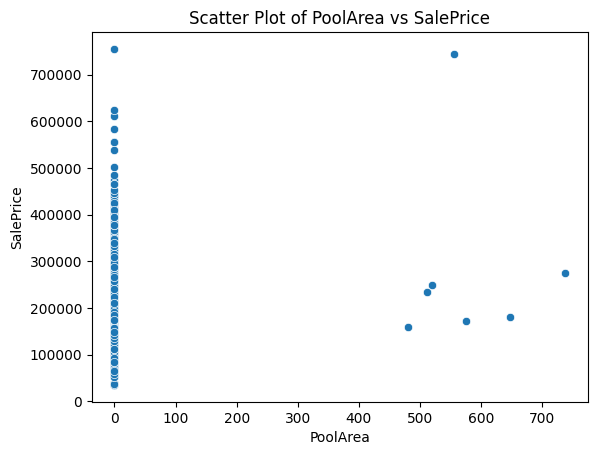

In [66]:
#Create a scatter plot using Seaborn for PoolArea  against SalePrice
sns.scatterplot(x='PoolArea', y='SalePrice', data=train)
plt.xlabel('PoolArea')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of PoolArea vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

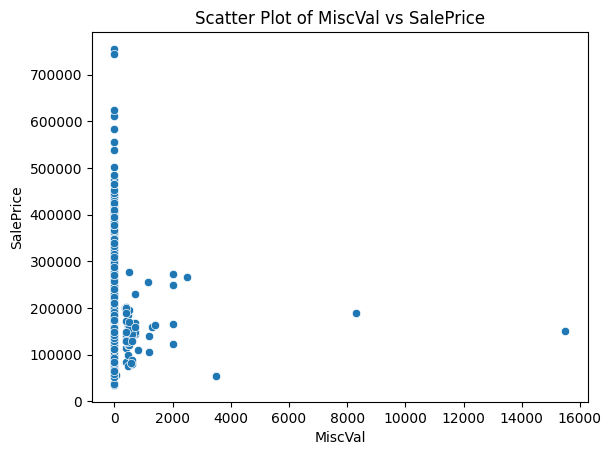

In [67]:
#Create a scatter plot using Seaborn for MiscVal  against SalePrice
sns.scatterplot(x='MiscVal', y='SalePrice', data=train)
plt.xlabel('MiscVal')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of MiscVal vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot

In [68]:
#now taking all the potential outliers values in a list so that we can drop it
values=[598,955,935,1299,250,314,336,707,379,1183,691,186,441,186,524,739,598,955,636,1062,1191,49,496,1299,198,181]


In [69]:
# This line of code is filtering the 'train' DataFrame based on the 'Id' column.

# 'train.Id.isin(values)' checks if each 'Id' in the 'train' DataFrame is in the 'values' list.
# It returns a Boolean Series of the same length as the 'Id' column, where each element is True if the corresponding 'Id' is in 'values', and False otherwise.

# 'train.Id.isin(values) == False' inverts the Boolean Series, so it's now True for 'Id's not in 'values' and False for 'Id's in 'values'.

# 'train[train.Id.isin(values) == False]' selects only the rows of the 'train' DataFrame where the condition is True, i.e., it selects the rows where the 'Id' is not in 'values'.

# Finally, 'train = train[train.Id.isin(values) == False]' replaces the original 'train' DataFrame with the new DataFrame that only includes the rows where the 'Id' is not in 'values'.

train=train[train.Id.isin(values)==False]


In [70]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1434
MiscFeature,1387
Alley,1348
Fence,1161
FireplaceQu,684
LotFrontage,253
GarageYrBlt,76
GarageCond,76
GarageType,76
GarageFinish,76


In [71]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [72]:
train['Alley'].unique() #3 types of alley

array([nan, 'Grvl', 'Pave'], dtype=object)

In [73]:
train['Alley'].fillna('NO', inplace=True)
test['Alley'].fillna('NO', inplace=True)

<ipython-input-73-3d9f0508f191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Alley'].fillna('NO', inplace=True)


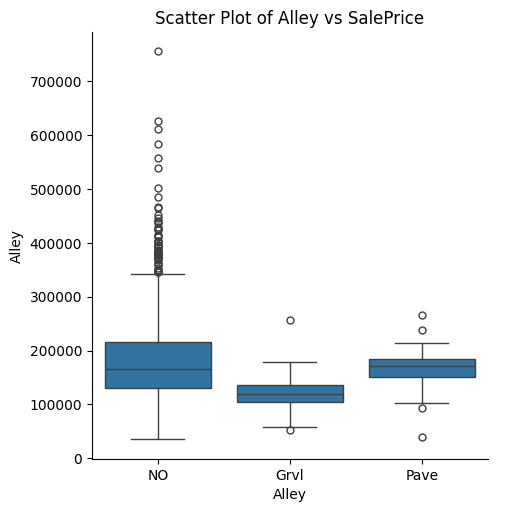

In [74]:
#Create a scatter plot using Seaborn for Alley'  against SalePrice
sns.catplot(x='Alley', y='SalePrice', data=train, kind="box")
plt.xlabel('Alley')  # Set the x-axis label
plt.ylabel('Alley')   # Set the y-axis label
plt.title('Scatter Plot of Alley vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

In [75]:
train.query('Alley == "Pave"').count()

Id               40
MSSubClass       40
MSZoning         40
LotFrontage      38
LotArea          40
                 ..
MoSold           40
YrSold           40
SaleType         40
SaleCondition    40
SalePrice        40
Length: 81, dtype: int64

In [76]:
train['Fence'].unique() #four types of fence

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [77]:
train['Fence'].fillna('NO', inplace=True)
test['Fence'].fillna('NO', inplace=True)

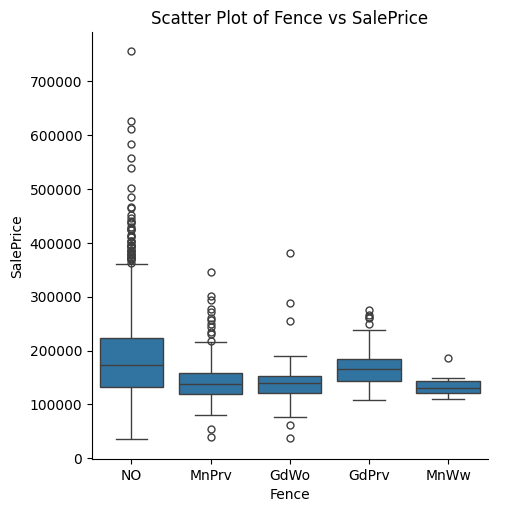

In [78]:
#Create a scatter plot using Seaborn for Alley'  against SalePrice
sns.catplot(x='Fence', y='SalePrice', data=train, kind="box")
plt.xlabel('Fence')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of Fence vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

In [79]:
train['MasVnrType'].unique() #four types of fence

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [80]:
train['MasVnrType'].fillna('NO', inplace=True)
test['MasVnrType'].fillna('NO', inplace=True)
#here this code is simply replacing all the missing values where it's Na/Nan with No


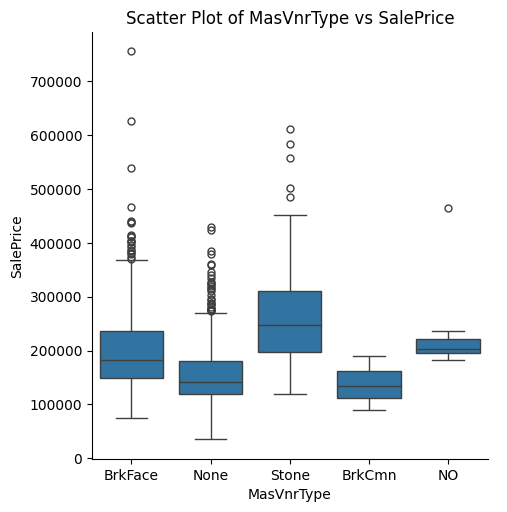

In [81]:
#Create a scatter plot using Seaborn for Alley'  against SalePrice
sns.catplot(x='MasVnrType', y='SalePrice', data=train, kind="box")
plt.xlabel('MasVnrType')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of MasVnrType vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

In [82]:
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
#here this code is simply replacing all the missing values where it's Na/Nan with No


In [83]:
train['FireplaceQu'].unique() #four types of fence

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [84]:
train['FireplaceQu'].fillna('No', inplace=True)
test['FireplaceQu'].fillna('No',inplace=True)

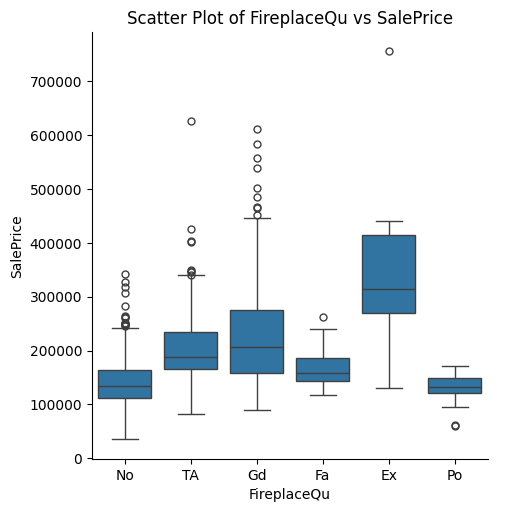

In [85]:
#Create a scatter plot using Seaborn for Alley'  against SalePrice
sns.catplot(x='FireplaceQu', y='SalePrice', data=train, kind="box")
plt.xlabel('FireplaceQu')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of FireplaceQu vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

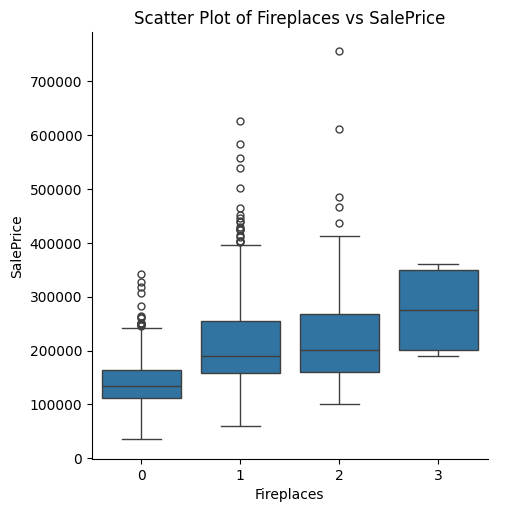

In [87]:
#Create a scatter plot using Seaborn for Alley'  against SalePrice
sns.catplot(x='Fireplaces', y='SalePrice', data=train, kind="box")
plt.xlabel('Fireplaces')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of Fireplaces vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

In [89]:
train['LotFrontage'].fillna('0', inplace=True)
test['LotFrontage'].fillna('0',inplace=True)

In [91]:
train['GarageYrBlt'].corr(train['YearBuilt'])
#correlation point
""" if the value is less than zero, it is a negative relationship. A value of zero indicates that there is no relationship between the two variables."""

' if the value is less than zero, it is a negative relationship. A value of zero indicates that there is no relationship between the two variables.'

In [92]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [93]:
train['GarageCond'].fillna('No', inplace=True)
test['GarageCond'].fillna('No',inplace=True)

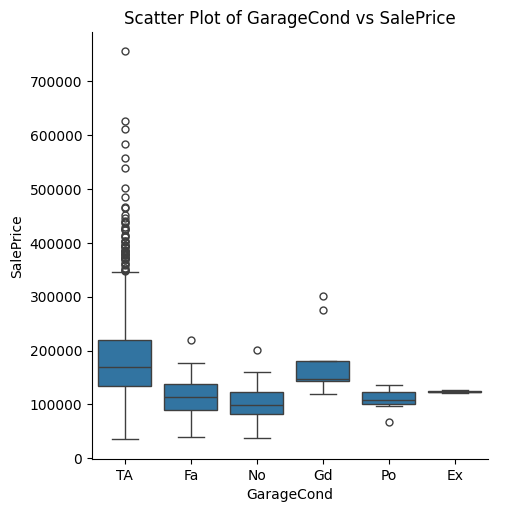

In [105]:
#Create a scatter plot using Seaborn for GarageCond against SalePrice
sns.catplot(x='GarageCond', y='SalePrice', data=train, kind="box")
plt.xlabel('GarageCond')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageCond vs SalePrice')  # Set the title of the plot
plt.show()  # Display the plot,

In [95]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [96]:
train['GarageType'].fillna('No', inplace=True)
test['GarageType'].fillna('No',inplace=True)

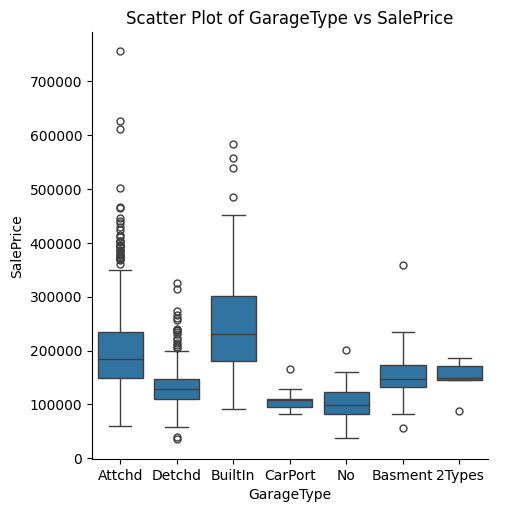

In [109]:
#Create a scatter plot using Seaborn for GarageType against SalePrice
sns.catplot(x='GarageType', y='SalePrice', data=train, kind="box")
plt.xlabel('GarageType')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageType vs SalePrice')  # Set the title of the plot
plt.show() #Display the plot

In [111]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [114]:
train['GarageFinish'].fillna('No', inplace=True)
test['GarageFinish'].fillna('No', inplace=True)

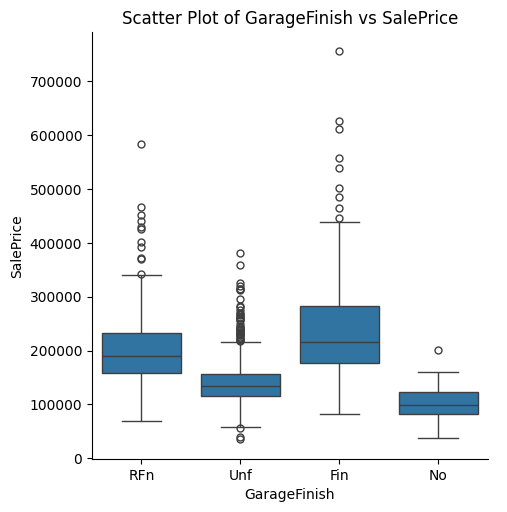

In [115]:
#Create a scatter plot using Seaborn for GarageFinish against SalePrice
sns.catplot(x='GarageFinish', y='SalePrice', data=train, kind="box")
plt.xlabel('GarageFinish')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageFinish vs SalePrice')  # Set the title of the plot
plt.show() #Display the plot

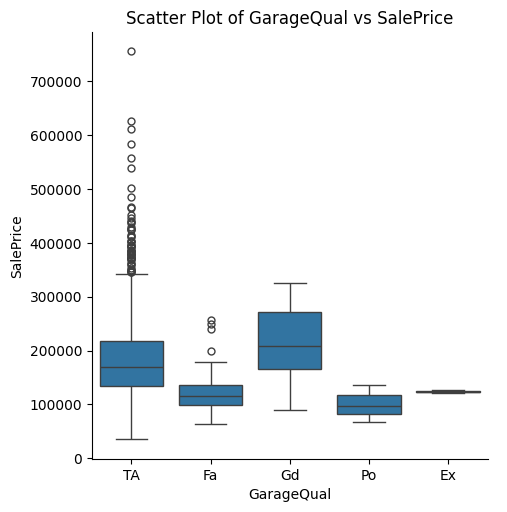

In [117]:
#Create a scatter plot using Seaborn for GarageQual against SalePrice
sns.catplot(x='GarageQual', y='SalePrice', data=train, kind="box")
plt.xlabel('GarageQual')  # Set the x-axis label
plt.ylabel('SalePrice')   # Set the y-axis label
plt.title('Scatter Plot of GarageQual vs SalePrice')  # Set the title of the plot
plt.show()#Display the plot